In [1]:
import os
import pandas as pd
import numpy as np

## Read Data

In [2]:
hdf5_file = 'datasets.h5'

datasets = {}
dataset_names = ['Office_A', 'Office_B', 'Home', 'Candanedo', 'Stjelja', 'Simulated']
# Note that the Stjelja dataset was not published along with this script and needs to be removed to run it.

for name in dataset_names:
    datasets[name] = pd.read_hdf(hdf5_file, name)

In [3]:
datasets['Office_A'].head(1)

,Day,Time,CO2,Temperature,Humidity,Occupancy
0,0,00:00:00,739.73,26.3,29.73,0


## Days

In [4]:
for name in dataset_names:
    print(name + ":", len(datasets[name]['Day'].unique()))

Office_A: 80
Office_B: 20
Home: 50
Candanedo: 8
Stjelja: 26
Simulated: 100


## Presence Rate

In [5]:
df = pd.DataFrame()
for name in dataset_names:
    df[name] = datasets[name]['Occupancy']
occ = df.agg([np.mean, np.std])
occ

,Office_A,Office_B,Home,Candanedo,Stjelja,Simulated
mean,0.323976,0.259514,0.753125,0.354514,0.113922,0.262622
std,0.467993,0.438376,0.431196,0.478387,0.317720,0.440060


<AxesSubplot:>

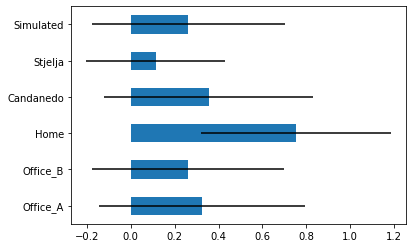

In [6]:
occ.T.plot(kind = "barh", y = "mean", legend = False, xerr = "std")

## CO2 Range

Office_A: 295.63 - 2116.3
Office_B: 513.57 - 1874.25
Home: 372.92 - 4864.1
Candanedo: 423.0 - 2072.0
Stjelja: 390.59 - 865.76
Simulated: 360.0 - 1451.65


<AxesSubplot:>

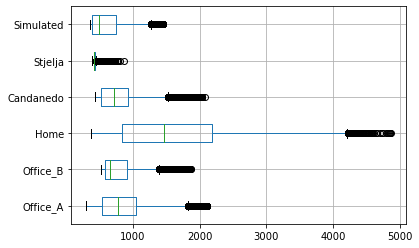

In [7]:
df = pd.DataFrame()
for name in dataset_names:
    print(name + ":",  round(datasets[name]['CO2'].min(), 2), "-", str(round(datasets[name]['CO2'].max(), 2)))
    df[name] = datasets[name]['CO2']
df.boxplot(vert=False)